In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

C:\Users\KIIT\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install --upgrade pandas

LOADING THE DATA

In [3]:
data = pd.read_csv(r"C:\Users\KIIT\Downloads\IPLData.csv")

In [118]:
data.head(3)

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#To check number of null values
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [6]:
#Shows the information about the dataset
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


CLEANING OUR DATA
In the above data, the players can be seggregated based on the following parameters

1.Capped
2.Uncapped
The Uncapped players are playing in the ipl for the first time

In [8]:
#seggregating data - capped batters
batters = data.loc[data["Player_Type"] == "Batter"]
batters_new = batters.loc[batters["Capped"] == 1]
Capped_Batters = batters_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate']]

In [9]:
#The seggregation gives us the list of players that have a history of playing in the IPL.
Capped_Batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [10]:
#Seggregating data - Capped bowlers
bowlers = data.loc[(data["Player_Type"] == "Bowler")]

bowlers_new = bowlers.loc[(bowlers["Capped"] == 1)]

Capped_Bowlers = bowlers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Wickets',
                              'Bowling_average',
                              'Economy',
                              'Bowling_Strike_Rate']]

In [11]:
Capped_Bowlers.head()

,Player Name,Team,Nationality,Matches_Played,Wickets,Bowling_average,Economy,Bowling_Strike_Rate


In [12]:
#seggregating capped keepers
Keepers = data.loc[data["Player_Type"] == "Keeper"]
Keepers_new = Keepers.loc[Keepers["Capped"] == 1]

Capped_Keepers = Keepers_new[['Player Name',
                              'Team',
                              'Nationality',
                              'Matches_Played',
                              'Runs',
                              'Average',
                              'Strike_Rate',
                             'Catches',
                             'Run_outs',
                             'Stumps']]


In [13]:
Capped_Keepers.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.3,130.9,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.4,127.5,58.0,12.0,2.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.5,136.3,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.5,142.2,18.0,1.0,4.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.8,129.7,123.0,14.0,32.0


In [24]:
# Segregating capped All rounders
AllRounders = data.loc[data["Player_Type"] == "Allrounder"]

# Filter capped All rounders
AllRounders_new = AllRounders.loc[AllRounders["Capped"] == 1]

# Selecting specific columns for capped All rounders
Capped_AllRounders = AllRounders_new[['Player Name',
                                      'Team',
                                      'Nationality',
                                      'Matches_Played',
                                      'Runs',
                                      'Average',
                                      'Strike_Rate',
                                      'Wickets',
                                      'Bowling_average',
                                      'Economy',
                                      'Bowling_Strike_Rate']]




In [25]:
Capped_AllRounders.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
127,Ravichandran Ashwin,Rajasthan,Indian,167.0,456.0,11.12,109.88,145.0,27.80,6.91,24.12
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
129,Dwayne Bravo,Chennai,Overseas,151.0,1537.0,22.94,130.25,167.0,24.32,8.36,17.44
130,Nitish Rana,Kolkata,Indian,77.0,1820.0,28.00,132.46,7.0,22.00,8.03,16.43
131,Jason Holder,Lucknow,Overseas,26.0,189.0,14.54,121.15,35.0,22.46,8.20,16.43


CLEANING THE DATA BY MAKING THE NULL OR NaN values as 0.
Capped_Batters = Capped_Batters.fillna(0)
Capped_AllRounders = Capped_AllRounders.fillna(0)
Capped_Keepers = Capped_Keepers.fillna(0)



In [27]:
#Checking null values in the data
print(Capped_Batters.isna().sum())
print(Capped_AllRounders.isna().sum())
print(Capped_Keepers.isna().sum())

Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64
Player Name            0
Team                   0
Nationality            0
Matches_Played         0
Runs                   1
Average                2
Strike_Rate            1
Wickets                4
Bowling_average        4
Economy                3
Bowling_Strike_Rate    4
dtype: int64
Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
Catches           1
Run_outs          1
Stumps            1
dtype: int64


INITIAL ANALYSIS Here, we analyse the data for batters,bowlers,Keepers and all rounders

In [28]:
# Sort the DataFrame by a column (e.g., 'Average')
Capped_Batters_sorted = Capped_Batters.sort_values(by='Average', ascending=False)

# Apply styling to the DataFrame
styled_df = Capped_Batters_sorted.style \
    .set_caption("Capped Batters with Batting Average > 30") \
    .set_properties(**{'text-align': 'center'}) \
    .highlight_max(subset=['Average'], color='lightgreen') \
    .highlight_min(subset=['Average'], color='lightcoral')

# Display the styled DataFrame
styled_df


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.000000,3273.000000,47.430000,136.380000
231,Ruturaj Gaikwad,Chennai,Indian,22.000000,839.000000,46.610000,132.130000
19,David Warner,Delhi,Overseas,150.000000,5449.000000,41.600000,139.970000
207,Kane Williamson,Hyderabad,Overseas,63.000000,1885.000000,40.110000,131.270000
208,Virat Kohli,Bangalore,Indian,207.000000,6283.000000,37.400000,129.950000
2,Faf Du Plessis,Bangalore,Overseas,100.000000,2935.000000,34.940000,131.090000
0,Shikhar Dhawan,Punjab,Indian,192.000000,5783.000000,34.630000,126.600000
26,David Miller,Gujarat,Overseas,89.000000,1974.000000,32.900000,136.510000
1,Shreyas Iyer,Kolkata,Indian,87.000000,2375.000000,31.670000,123.960000
7,Devdutt Padikkal,Rajasthan,Indian,29.000000,884.000000,31.570000,125.050000


In [29]:
# Sorting Capped_Batters by 'Average' in descending order
Capped_Batters_sorted_avg = Capped_Batters.sort_values(by='Average', ascending=False)

# Sorting Capped_Batters by 'Strike_Rate' in descending order
Capped_Batters_sorted_sr = Capped_Batters.sort_values(by='Strike_Rate', ascending=False)

# Sorting Capped_Batters by 'Runs' in descending order
Capped_Batters_sorted_runs = Capped_Batters.sort_values(by='Runs', ascending=False)

# Sorting Capped_Batters by 'Matches_Played' in descending order
Capped_Batters_sorted_matches = Capped_Batters.sort_values(by='Matches_Played', ascending=False)


In [30]:
Capped_Batters_sorted_avg

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
7,Devdutt Padikkal,Rajasthan,Indian,29.0,884.0,31.57,125.05


In [31]:
Capped_Batters_sorted_sr

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17
216,Prithvi Shaw,Delhi,Indian,53.0,1305.0,24.62,146.30
217,Abdul Samad,Hyderabad,Indian,23.0,222.0,15.86,146.02
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
30,Evin Lewis,Lucknow,Overseas,21.0,581.0,27.67,138.00
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
228,Yashasvi Jaiswal,Rajasthan,Indian,13.0,289.0,22.23,136.32
12,Rahul Tripathi,Hyderabad,Indian,62.0,1385.0,26.13,136.32
220,Mayank Agarwal,Punjab,Indian,100.0,2135.0,23.46,135.73


In [32]:
Capped_Batters_sorted_runs 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
205,Rohit Sharma,Mumbai,Indian,213.0,5611.0,31.17,130.40
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
5,Robin Uthappa,Chenai,Indian,193.0,4722.0,27.94,130.15
14,Ajinkya Rahane,Kolkata,Indian,151.0,3941.0,31.53,121.34
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96


In [33]:
Capped_Batters_sorted_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
205,Rohit Sharma,Mumbai,Indian,213.0,5611.0,31.17,130.40
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
5,Robin Uthappa,Chenai,Indian,193.0,4722.0,27.94,130.15
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
14,Ajinkya Rahane,Kolkata,Indian,151.0,3941.0,31.53,121.34
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
225,Suryakumar Yadav,Mumbai,Indian,115.0,2341.0,28.90,135.71
15,Mandeep Singh,Delhi,Indian,105.0,1674.0,22.00,124.00
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09


Based on the above analysis, we conclude the top three batsmen that have been consistent in all the criterias

1.David Warner
2.KL Rahul
3.Virat Kohli

In [48]:
#Analyzing All Rounder data
#Here, we have narrowed our analysis by further seggregating the all rounders based on strike rate equal to or more than 140.0
top_allrounders = Capped_AllRounders.loc[(Capped_AllRounders["Strike_Rate"] >= 140.0)]
top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)

# Narrowing analysis to all-rounders with a strike rate of 140.0 or more
top_allrounders = Capped_AllRounders.loc[(Capped_AllRounders["Strike_Rate"] >= 140.0)]

# Sorting the top all-rounders based on their average
top_allrounders_average = top_allrounders.sort_values('Average', ascending=False)

# Sorting the top all-rounders based on their runs
top_allrounders_runs = top_allrounders.sort_values('Runs', ascending=False)


# Sorting the top all-rounders based on their matches played
top_allrounders_matches = top_allrounders.sort_values('Matches_Played', ascending=False)

# Sorting the top all-rounders based on their economy
top_allrounders_economy = top_allrounders.sort_values('Economy', ascending=True)

top_allrounders_strike_rate = top_allrounders.sort_values('Bowling_Strike_Rate', ascending=True)

top_allrounders_wickets = top_allrounders.sort_values('Wickets', ascending=False)





In [40]:
top_allrounders_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [39]:
top_allrounders_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38


In [41]:
top_allrounders_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


In [42]:
top_allrounders_economy

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51


In [45]:
top_allrounders_strike_rate 

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
202,Aman Khan,Kolkata,Indian,5.0,40.0,13.30,148.10,0.0,0.00,7.00,0.00
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18


In [49]:
top_allrounders_wickets

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate
232,Sunil Narine,Kolkata,Overseas,134.0,954.0,15.64,161.69,143.0,24.53,6.74,21.83
204,Andre Russell,Kolkata,Overseas,84.0,1700.0,29.31,178.57,72.0,26.40,9.05,17.51
233,Kieron Pollard,Mumbai,Overseas,178.0,3268.0,29.98,149.77,65.0,31.62,8.78,21.60
165,Jofra Archer,Mumbai,Overseas,35.0,195.0,15.00,157.26,46.0,21.33,7.13,17.93
211,Hardik Pandya,Gujarat,Indian,92.0,1476.0,27.33,153.91,42.0,31.26,9.07,20.69
128,Pat Cummins,Kolkata,Overseas,37.0,316.0,19.75,140.44,38.0,30.13,8.24,21.95
218,Glen Maxwell,Bangalore,Overseas,97.0,2018.0,25.23,151.84,22.0,41.59,8.55,29.18
223,Moeen Ali,Chennai,Overseas,34.0,666.0,22.97,146.37,16.0,29.31,6.85,25.69
154,K Gowtham,Lucknow,Indian,24.0,186.0,14.31,169.09,13.0,43.23,8.26,31.38
195,Mohammad Nabi,Kolkata,Overseas,17.0,180.0,15.00,151.26,13.0,31.38,7.14,26.38


After analyzing the above data, we can say that the top 4 All rounders that have been consistent are:
1. Kieron Pollard
2. Andre Russel
3. Sunil Narine
4. Aman Khan

In [50]:
#Analysing keepers data
#we have narrowed our analysis down to keepers having average >= 25.0
top_Keepers = Capped_Keepers.loc[(Capped_Keepers["Average"] >= 25.0)]

In [58]:
top_keepers_avg = Capped_Keepers.sort_values(by='Average', ascending=False)
top_keepers_strike_rate = Capped_Keepers.sort_values(by='Strike_Rate', ascending=False)
top_keepers_runs = Capped_Keepers.sort_values(by='Runs', ascending=False)
top_keepers_matches = Capped_Keepers.sort_values(by='Matches_Played', ascending=False)
top_keepers_catches = Capped_Keepers.sort_values(by='Catches', ascending=False)
top_keepers_run_outs = Capped_Keepers.sort_values(by='Run_outs', ascending=False)
top_keepers_stumps = Capped_Keepers.sort_values(by='Stumps', ascending=False)




In [59]:
top_keepers_avg

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
111,KS Bharat,Delhi,Indian,8.0,191.0,38.20,122.40,4.0,0.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [60]:
top_keepers_strike_rate

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
110,Nicholas Pooran,Hyderabad,Overseas,33.0,606.0,22.40,155.00,11.0,3.0,0.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
117,Sam Billings,Kolkata,Overseas,22.0,334.0,17.60,133.60,13.0,1.0,0.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0


In [61]:
top_keepers_runs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,2110.0,24.50,128.70,69.0,3.0,20.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0


In [63]:
top_keepers_matches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,2110.0,24.50,128.70,69.0,3.0,20.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,606.0,22.40,155.00,11.0,3.0,0.0


In [64]:
top_keepers_catches

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,2110.0,24.50,128.70,69.0,3.0,20.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0


In [65]:
top_keepers_run_outs

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
219,Jos Butler,Rajasthan,Overseas,65.0,1968.0,35.14,150.00,34.0,3.0,1.0
110,Nicholas Pooran,Hyderabad,Overseas,33.0,606.0,22.40,155.00,11.0,3.0,0.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,2110.0,24.50,128.70,69.0,3.0,20.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0


In [66]:
top_keepers_stumps

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate,Catches,Run_outs,Stumps
213,MS Dhoni,Chennai,Indian,220.0,4746.0,39.50,135.80,126.0,21.0,39.0
109,Dinesh Karthik,Bangalore,Indian,213.0,4046.0,25.80,129.70,123.0,14.0,32.0
118,Wridhhiman Saha,Gujarat,Indian,133.0,2110.0,24.50,128.70,69.0,3.0,20.0
105,Quinton De Kock,Lucknow,Overseas,77.0,2256.0,31.30,130.90,53.0,0.0,14.0
206,Rishabh Pant,Delhi,Indian,84.0,2498.0,35.18,147.46,56.0,5.0,14.0
209,Sanju Samson,Rajasthan,Indian,121.0,3068.0,29.22,134.21,59.0,8.0,10.0
108,Jonny Bairstow,Punjab,Overseas,28.0,1038.0,41.50,142.20,18.0,1.0,4.0
107,Ishan Kishan,Mumbai,Indian,61.0,1452.0,28.50,136.30,19.0,1.0,2.0
106,Ambati Rayudu,Chennai,Indian,175.0,3916.0,29.40,127.50,58.0,12.0,2.0
121,Vishnu Vinod,Hyderabad,Indian,3.0,19.0,6.30,73.10,0.0,0.0,2.0


After analyzing the above data, we can conclude that the best Keepers are:
1. M S Dhoni
2. Dinesh Karthik
3. Rishab Pant

VISUALIZATION FOR ENHANCED ANALYSIS
Now, the initial analysis has been done. We will move on to Visual analysis for enhanced approach.

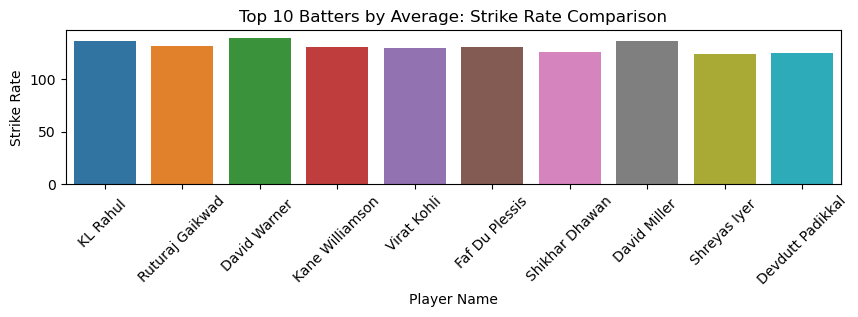

In [85]:
# Selecting only the top 10 batters based on average
top_10_batters_avg = Capped_Batters_sorted_avg.head(10)

# Creating the plot for the top 5 batters' strike rate
plt.figure(figsize=(10, 2))
sns.barplot(x='Player Name', y='Strike_Rate', data=top_10_batters_avg)
plt.title('Top 10 Batters by Average: Strike Rate Comparison')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()


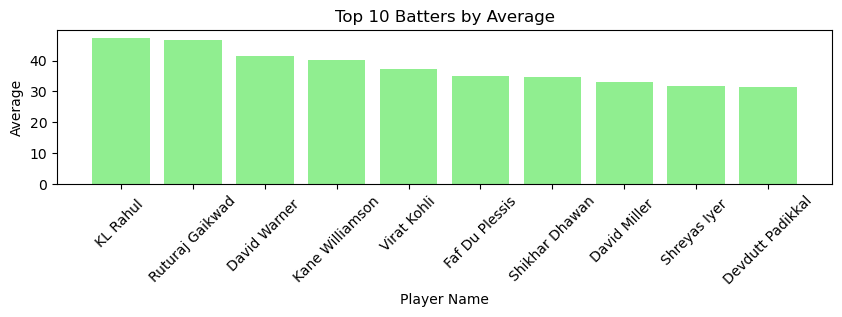

In [88]:
# Selecting the top 10 batters based on average
top_10_batters_avg = Capped_Batters_sorted_avg.head(10)

# Creating the plot for the top 10 batters' average
plt.figure(figsize=(10, 2))
plt.bar(top_10_batters_avg['Player Name'], top_10_batters_avg['Average'], color='lightgreen')
plt.title('Top 10 Batters by Average')
plt.xlabel('Player Name')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()


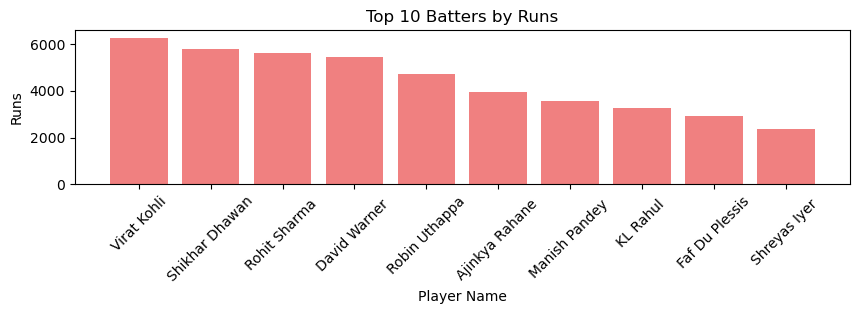

In [90]:
# Selecting the top 10 batters based on runs
top_10_batters_runs = Capped_Batters_sorted_runs.head(10)

# Creating the plot for the top 10 batters' runs
plt.figure(figsize=(10, 2))
plt.bar(top_10_batters_runs['Player Name'], top_10_batters_runs['Runs'], color='lightcoral')
plt.title('Top 10 Batters by Runs')
plt.xlabel('Player Name')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

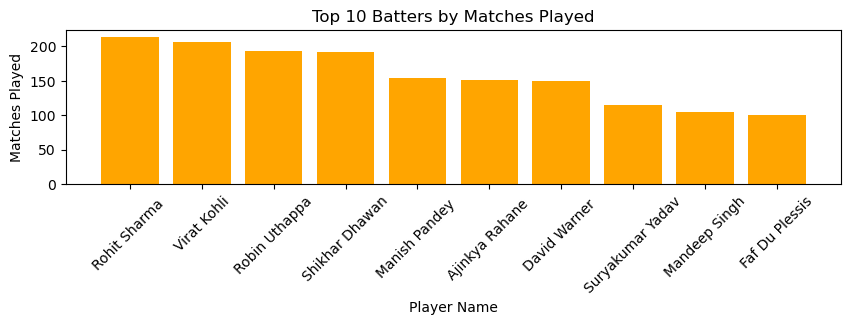

In [92]:
# Selecting the top 10 batters based on matches played
top_10_batters_matches = Capped_Batters_sorted_matches.head(10)

# Creating the plot for the top 10 batters' matches played
plt.figure(figsize=(10, 2))
plt.bar(top_10_batters_matches['Player Name'], top_10_batters_matches['Matches_Played'], color='orange')
plt.title('Top 10 Batters by Matches Played')
plt.xlabel('Player Name')
plt.ylabel('Matches Played')
plt.xticks(rotation=45)
plt.show()

Visualising All-rounder data

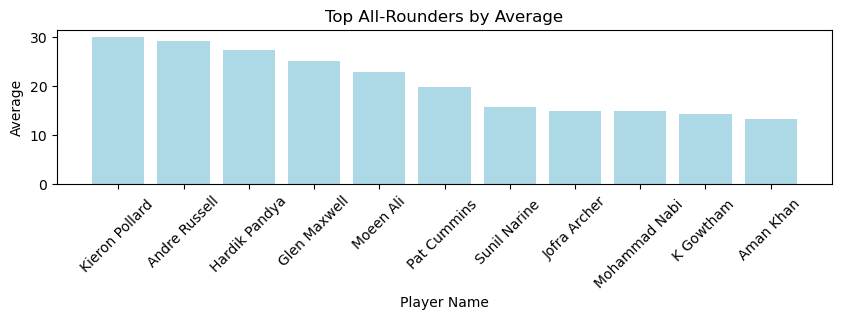

In [94]:
import matplotlib.pyplot as plt

# Creating the plot for top all-rounders by average
plt.figure(figsize=(10, 2))
plt.bar(top_allrounders_average['Player Name'], top_allrounders_average['Average'], color='lightblue')
plt.title('Top All-Rounders by Average')
plt.xlabel('Player Name')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

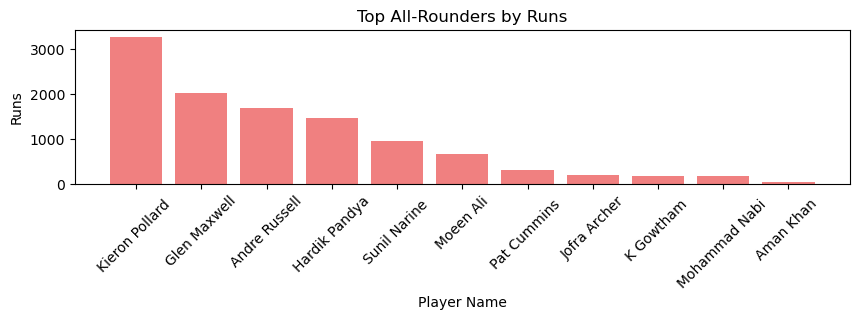

In [96]:
# Creating the plot for top all-rounders by runs
plt.figure(figsize=(10, 2))
plt.bar(top_allrounders_runs['Player Name'], top_allrounders_runs['Runs'], color='lightcoral')
plt.title('Top All-Rounders by Runs')
plt.xlabel('Player Name')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

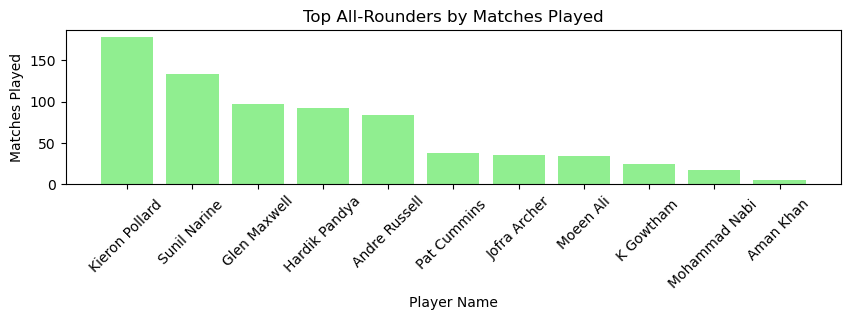

In [98]:
# Creating the plot for top all-rounders by matches played
plt.figure(figsize=(10, 2))
plt.bar(top_allrounders_matches['Player Name'], top_allrounders_matches['Matches_Played'], color='lightgreen')
plt.title('Top All-Rounders by Matches Played')
plt.xlabel('Player Name')
plt.ylabel('Matches Played')
plt.xticks(rotation=45)
plt.show()

Now, we will plot the bar graph for top keepers

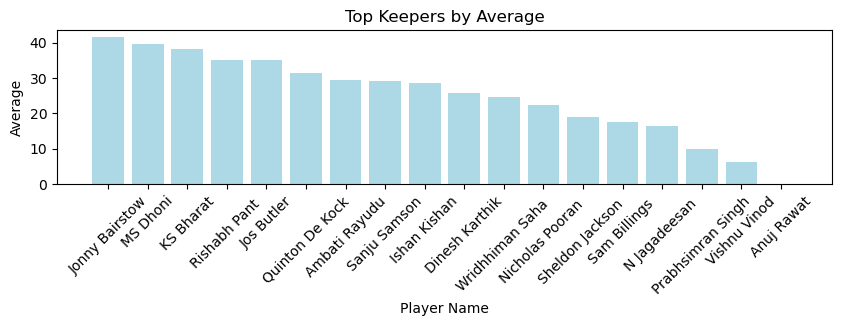

In [99]:
import matplotlib.pyplot as plt

# Creating the plot for top keepers by average
plt.figure(figsize=(10, 2))
plt.bar(top_keepers_avg['Player Name'], top_keepers_avg['Average'], color='lightblue')
plt.title('Top Keepers by Average')
plt.xlabel('Player Name')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

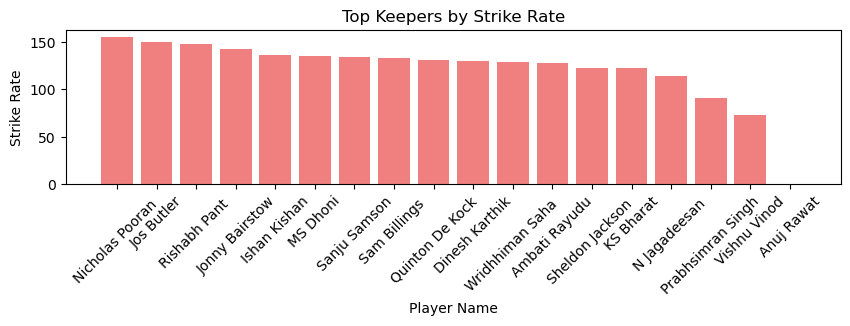

In [101]:
# Creating the plot for top keepers by strike rate
plt.figure(figsize=(10, 2))
plt.bar(top_keepers_strike_rate['Player Name'], top_keepers_strike_rate['Strike_Rate'], color='lightcoral')
plt.title('Top Keepers by Strike Rate')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45)
plt.show()

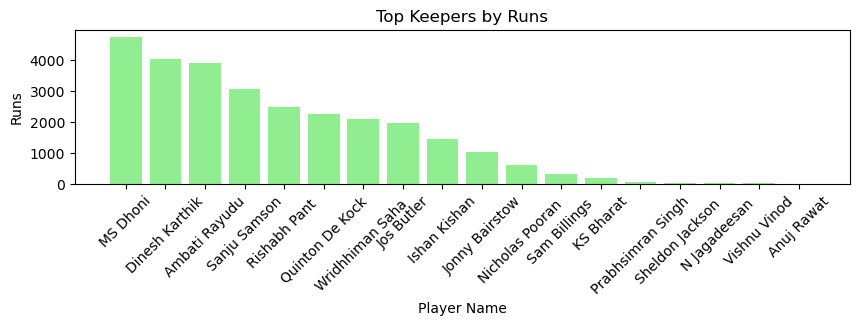

In [103]:
# Creating the plot for top keepers by runs
plt.figure(figsize=(10, 2))
plt.bar(top_keepers_runs['Player Name'], top_keepers_runs['Runs'], color='lightgreen')
plt.title('Top Keepers by Runs')
plt.xlabel('Player Name')
plt.ylabel('Runs')
plt.xticks(rotation=45)
plt.show()

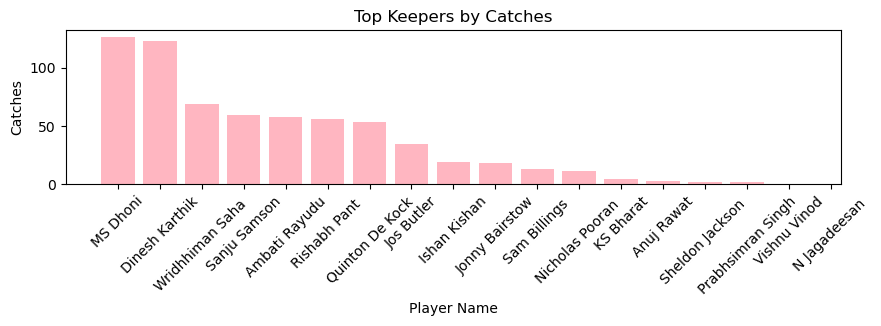

In [105]:
# Creating the plot for top keepers by catches
plt.figure(figsize=(10, 2))
plt.bar(top_keepers_catches['Player Name'], top_keepers_catches['Catches'], color='lightpink')
plt.title('Top Keepers by Catches')
plt.xlabel('Player Name')
plt.ylabel('Catches')
plt.xticks(rotation=45)
plt.show()

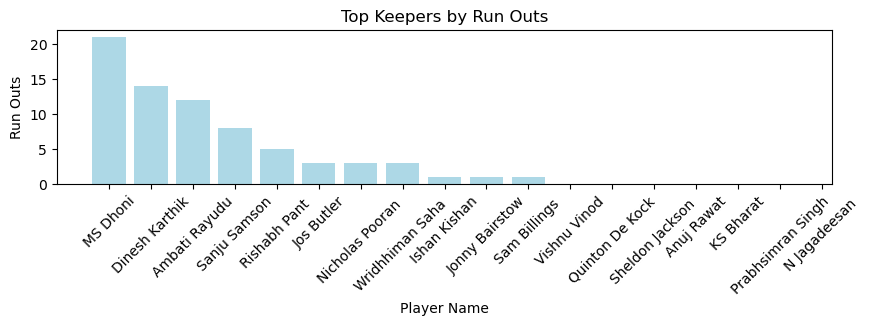

In [107]:
# Creating the plot for top keepers by run outs
plt.figure(figsize=(10, 2))
plt.bar(top_keepers_run_outs['Player Name'], top_keepers_run_outs['Run_outs'], color='lightblue')
plt.title('Top Keepers by Run Outs')
plt.xlabel('Player Name')
plt.ylabel('Run Outs')
plt.xticks(rotation=45)
plt.show()


For our final analysis, we will consider the following:
    1. Three batsmen
    2. Three bowlers
    3. Four All rounders
    4. one wicket keeper

In [116]:
# Concatenate top performers from batters, keepers, and all-rounders
top_performers = pd.concat([Capped_Batters_sorted_avg, top_keepers_avg, top_allrounders_average])

# Sort the concatenated DataFrame by some performance metric (e.g., average) in descending order
top_performers_sorted = top_performers.sort_values(by='Average', ascending=False)

# Select the top 11 players for the final team
final_team = top_performers_sorted.head(11)

# Print the final team
print("Final Team:")
print(final_team[['Player Name', 'Team', 'Nationality']])

print("Final Team:")
print("=" * 60)
print("{:<20} {:<15} {:<15}".format('Player Name', 'Team', 'Nationality'))
print("-" * 60)
for index, row in final_team[['Player Name', 'Team', 'Nationality']].iterrows():
    print("{:<20} {:<15} {:<15}".format(row['Player Name'], row['Team'], row['Nationality']))
print("=" * 60)



Final Team:
         Player Name       Team Nationality
212        KL Rahul     Lucknow      Indian
231  Ruturaj Gaikwad    Chennai      Indian
19     David Warner       Delhi    Overseas
108   Jonny Bairstow     Punjab    Overseas
207  Kane Williamson  Hyderabad    Overseas
213         MS Dhoni    Chennai      Indian
111        KS Bharat      Delhi      Indian
208      Virat Kohli  Bangalore      Indian
206    Rishabh Pant       Delhi      Indian
219       Jos Butler  Rajasthan    Overseas
2     Faf Du Plessis  Bangalore    Overseas
Final Team:
Player Name          Team            Nationality    
------------------------------------------------------------
KL Rahul             Lucknow         Indian         
Ruturaj Gaikwad      Chennai         Indian         
David Warner         Delhi           Overseas       
Jonny Bairstow       Punjab          Overseas       
Kane Williamson      Hyderabad       Overseas       
MS Dhoni             Chennai         Indian         
KS Bharat       